In [1]:
import numpy as np



In [1]:
print(1+2)
2+3

3


5

In [41]:
class MyLinearRegression():
    def __init__(self, fit_intercept = True):
        self.fit_intercept = fit_intercept

    def fit(self, x, y):
        n, k = x.shape
        x_train = x
        if self.fit_intercept:
            x_train = np.hstack((x, np.ones((n,1))))
        self.w = np.linalg.inv(x_train.T @ x_train) @ x_train.T @ y

        return self

    def predict(self, x):
        n, k = x.shape

        if self.fit_intercept:
            x_train = np.hstack((x, np.ones((n,1))))

        y_pred  = x_train @ self.w

        return y_pred

    def get_weights(self):
        return self.w

In [42]:
from sklearn.model_selection import train_test_split

def linear_expression(x):
    return 5 * x + 6


objects_num = 50

x = np.linspace(-5, 5, objects_num)
y = linear_expression(x) + np.random.randn(objects_num)*5


x_train, x_test, y_train, y_test = train_test_split(x, y)

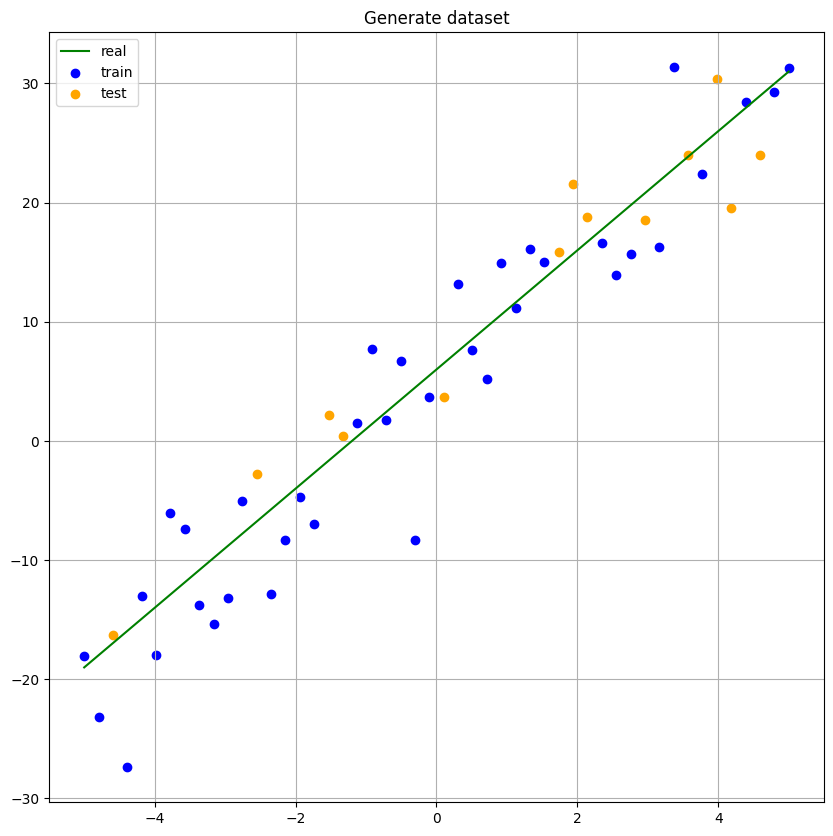

In [43]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.plot(x, linear_expression(x), label="real", c="g")
plt.scatter(x_train, y_train, label="train", c="b")
plt.scatter(x_test, y_test, label="test", c="orange")

plt.title("Generate dataset")
plt.grid()
plt.legend()
plt.show()





In [46]:
# print(x_train)
# print(x_train[:, np.newaxis])
# print(x_train[...,None])

my_model = MyLinearRegression()
# my_model.fit(x_train[:, np.newaxis], y_train)
my_model.fit(x_train[:, np.newaxis], y_train)
predict = my_model.predict(x_test[:, np.newaxis])
print(predict)
my_model.w

[ -8.23738892   5.61352165  20.52988688  14.13715893  15.20261359
  -2.91011562  16.26806825 -18.89193551  29.05352416  25.85716018
  -1.84466096  26.92261484  23.72625086]


array([5.22072783, 5.08079432])

In [52]:
my_model.w
from sklearn.linear_model import LinearRegression
sk_model = LinearRegression().fit(x_train[:,np.newaxis], y_train)\

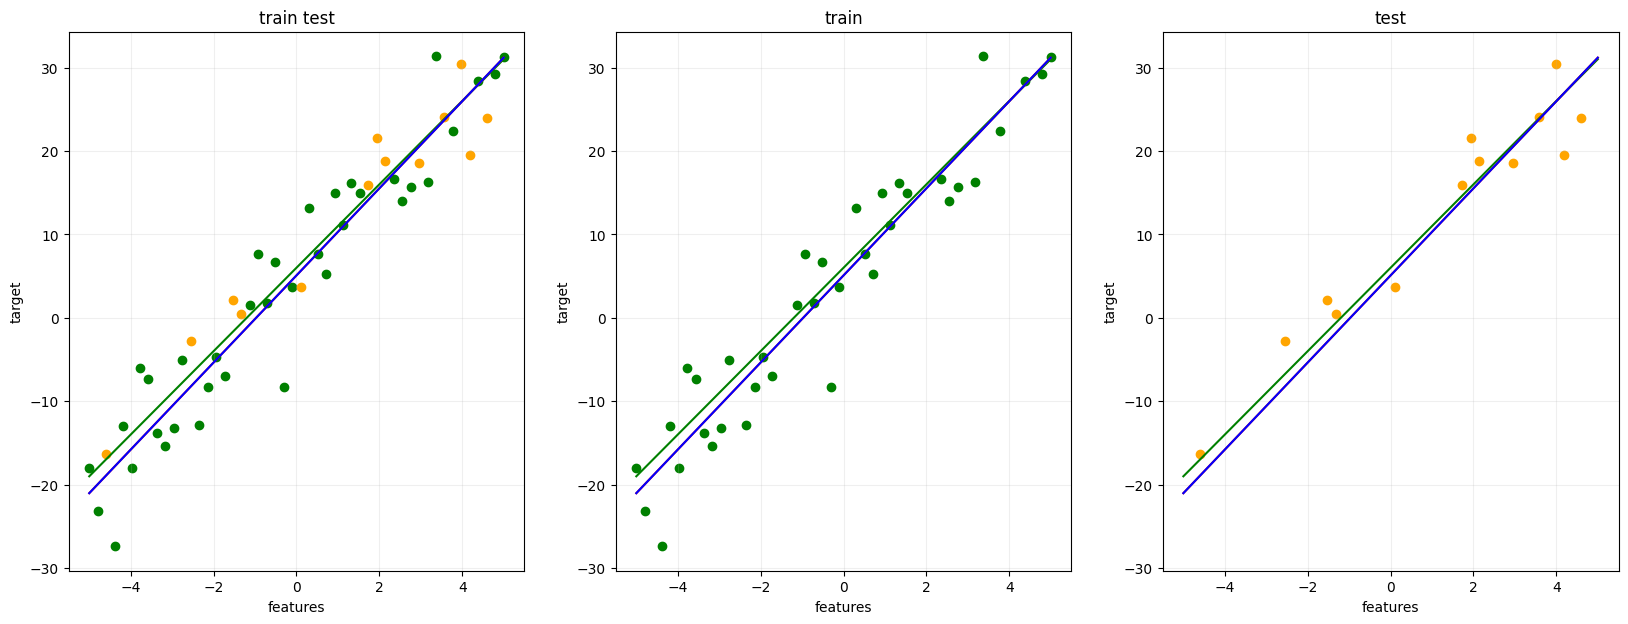

In [53]:
plt.figure(figsize=(20,7))
ax = None



for i, types in enumerate([["train", "test"], ["train"], ["test"]]):
    ax = plt.subplot(1,3,i+1, sharey=ax)
    if "train" in types:
        plt.scatter(x_train, y_train, label="train", c="g")
    if "test" in types:
        plt.scatter(x_test, y_test, label="test", c="orange")

    plt.plot(x, linear_expression(x), label="red", c="g")
    plt.plot(x, my_model.predict(x[:,np.newaxis]),label="predict", c="r")
    plt.plot(x, sk_model.predict(x[:,np.newaxis]),label="predict", c="b")

    plt.ylabel("target")
    plt.xlabel("features")
    plt.title(" ".join(types))
    plt.grid(alpha=0.2)
    plt.legend
plt.show()




In [56]:
from sklearn.metrics import mean_squared_error

train_predict = my_model.predict(x_train[:,np.newaxis])
test_predict = my_model.predict(x_test[:,np.newaxis])

print(f"MSE mymodel train predict: ", mean_squared_error(y_train, train_predict))
print(f"MSE mymodel train predict: ", mean_squared_error(y_test, test_predict))

sk_train_predict = sk_model.predict(x_train[:,np.newaxis])
sk_test_predict = sk_model.predict(x_test[:,np.newaxis])

print(f"MSE Sklearn train predict: ", mean_squared_error(y_train, sk_train_predict))
print(f"MSE Sklearn train predict: ", mean_squared_error(y_test, sk_test_predict))


MSE mymodel train predict:  21.51833150690313
MSE mymodel train predict:  17.397850461642165
MSE Sklearn train predict:  21.518331506903134
MSE Sklearn train predict:  17.397850461642165
